<center><h1>Kick Starter Project 2018 Analysis</h1></center>
<hr>

### Author(s)

- Ong De Lin (@Delinhquent)

- Chong Jun Guo (@JunGuoo)

from 7 May 2019 Sat 7.00pm

### Executive Summary

As technology is advancing, we believed that technology projects has a very high chance of success. After analyzing, we found out that this is false as technology has a higher failure rate than success rate.

We would also like to look into what are the attributes that will make a kickstarter project succeed.

### Research Topic & Hypothesis

As technology is advancing, we believed that technology projects has a very high chance of success.

We would also like to look into what are the attributes that will make a kickstarter project succeed.

<hr>

**Datasets used:**
- Source 1 ([Dataset 1](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv)) retrieved on 25 May 2019



<h1> Importing Relevant Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set matplotlib inline
%matplotlib inline

from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix,accuracy_score, roc_curve, auc

<h1> Importing Dataset </h1>

In [2]:
# dec2016df = pd.read_csv('ks-projects-201612.csv')
df = pd.read_csv('ks-projects-201801.csv')
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


<h1> Exploratory Data Analysis </h1>

In [3]:
df.shape

(378661, 15)

From here, we can see that the original dataset has 378,661 rows with 15 columns.

In [4]:
#Check for duplicated rows
count = 0
for rows in df.duplicated():
    if rows == True:
        count += 1
if count > 0:
    print("There are",count,"duplicated rows")
else:
    print("There are no duplicated rows")

#check for null values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
df.isnull().sum()

There are no duplicated rows


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

From here, we can see that  there is no duplicated rows.

Although there are null values in name and usd pledged column, there is no significant impact to our analysis.

Name does not have any meaningful contribution to our analysis. Usd Pledged can be replaced with usd_pledged_real.

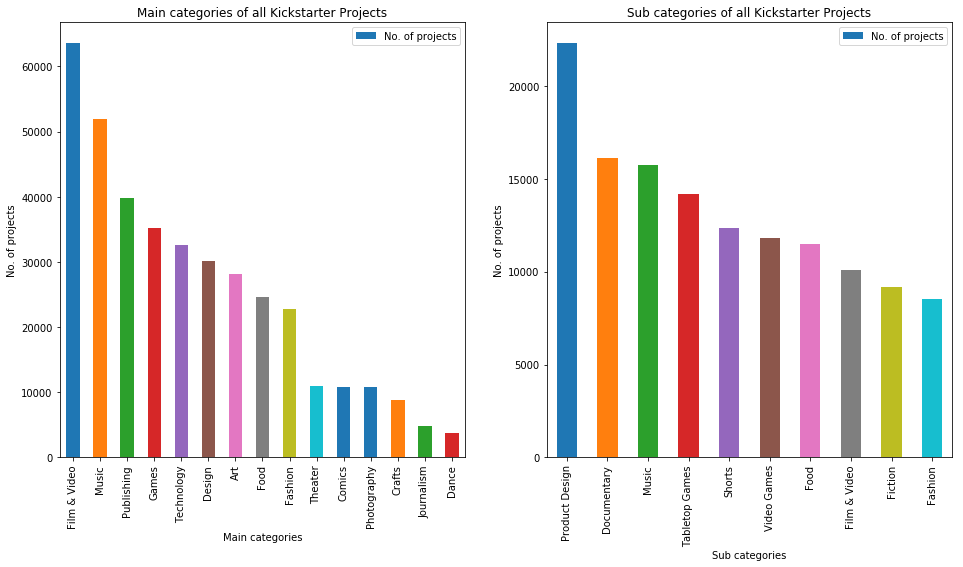

In [5]:
main_categories = df.groupby('main_category')['ID'].nunique().sort_values(ascending=False).reset_index(name='count')
# print(main_categories)

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

main_categories.plot(kind='bar', x='main_category', y='count', ax=ax1)
ax1.set_ylabel("No. of projects")
ax1.set_xlabel("Main categories")
ax1.set_title("Main categories of all Kickstarter Projects")
ax1.legend(['No. of projects'])

sub_categories = df.groupby('category')['ID'].nunique().sort_values(ascending=False).reset_index(name='count')
# print(sub_categories[:10])


sub_categories[:10].plot(kind='bar', x='category', y='count', ax=ax2)
ax2.set_ylabel("No. of projects")
ax2.set_xlabel("Sub categories")
ax2.set_title("Sub categories of all Kickstarter Projects")
ax2.legend(['No. of projects'])

plt.show()

On the left, these are the main categories of all Kickstarter Projects along with the count of each categories.
The most popular categories are "Film & Video", "Music", "Publishing", "Games" and "Technology".
The least popular categories are "Dance", "Journalism", "Crafts", "Photography" and "Comics".

On the right, these are the sub categories of all Kickstarter Projects along with the count of each categories.
The top 10 most popular sub categories are "Product Design", "Documentary", "Music", "Tabletop Games", "Shorts",
"Video Games", "Food", "Film & Video", "Fiction" and "Fashion".

In [6]:
countries = df.groupby('country')['ID'].nunique().sort_values(ascending=False)
print(countries)

country
US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: ID, dtype: int64


In [7]:
statusdf = df.copy()
statusdf = statusdf.groupby('state').size().reset_index(name='count')
statusdf

,state,count
0,canceled,38779
1,failed,197719
2,live,2799
3,successful,133956
4,suspended,1846
5,undefined,3562


As there are many different state, for simplicity, we will only analyze two states, "Successful" & "Failed"
This will be based on the usd_pledged_real and usd_goal_real. If usd_pledged_real is more than or equals to
usd_goal_real, we will treat it as successful (1). Else, failed (0).

In [8]:
updateddf = df.copy()
updateddf.loc[updateddf.usd_pledged_real >= updateddf.usd_goal_real, 'newstate'] = 1  
updateddf.loc[updateddf.usd_pledged_real < updateddf.usd_goal_real, 'newstate'] = 0  

newstatusdf = updateddf.copy()
newstatusdf = updateddf.groupby('newstate').size().reset_index(name='count')
newstatusdf

,newstate,count
0,0.0,241619
1,1.0,137042


From here, we can see that projects have a failure rate of % and success rate of %.

In [9]:
categorystatusdf = updateddf.copy()
categorystatusdf.groupby(['category','newstate']).size().reset_index(name='count').head()

,category,newstate,count
0,3D Printing,0.0,435
1,3D Printing,1.0,248
2,Academic,0.0,726
3,Academic,1.0,190
4,Accessories,0.0,2067


In [10]:
categorystatusdf.groupby(['category','newstate']).size().reset_index(name='count').shape

(318, 3)

As there are alot of records, it is difficult to analyze this. We decided to use the pivot table to transform & plot using stacked bar chart.

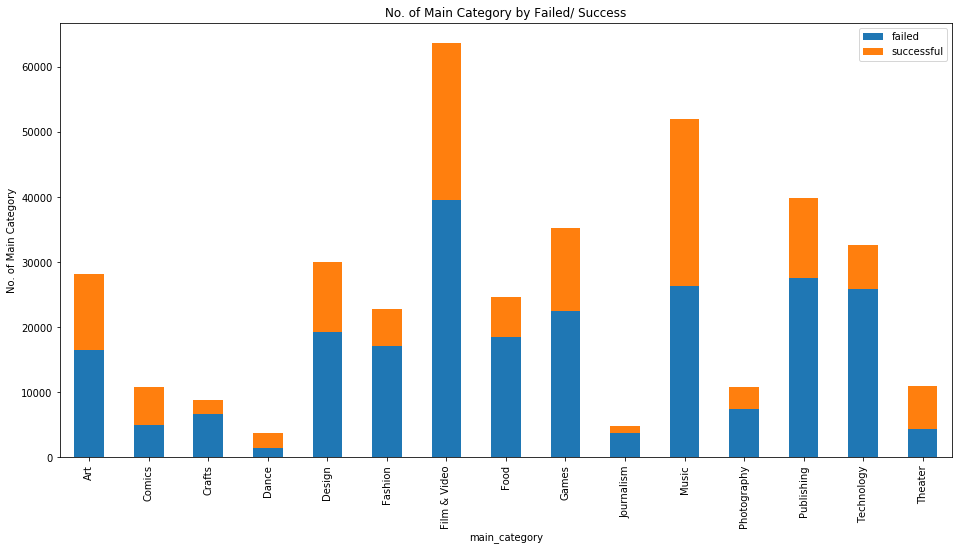

In [11]:
categorystatusdf = updateddf.copy()
categorystatusdf = categorystatusdf.groupby(['main_category','newstate']).size().reset_index(name='count')
categorystatusdf

categorystatuspivot = pd.pivot_table(categorystatusdf, index=['main_category'], columns=['newstate'],
                                       values='count', aggfunc=np.sum)
categorystatuspivot = categorystatuspivot.reset_index()
categorystatuspivot.columns = ['main_category', 'failed', 'successful']
# categorystatuspivot.head()
categorystatuspivot_i = categorystatuspivot.set_index('main_category')
categorystatuspivot_i
fig, ax1 = plt.subplots()
categorystatuspivot_i.plot(kind='bar', stacked=True, 
                                  figsize=(16,8), title="No. of Main Category by Failed/ Success",
                                   ax=ax1)
ax1.set_ylabel("No. of Main Category")
plt.show()

From here, we can quickly glance which main category has a higher chance of success. 
From here, we can conclude that Technology projects has already a higher chance to fail than succeed, 
rejecting our hypothesis that Technology projects has a higher chance of suceeding.

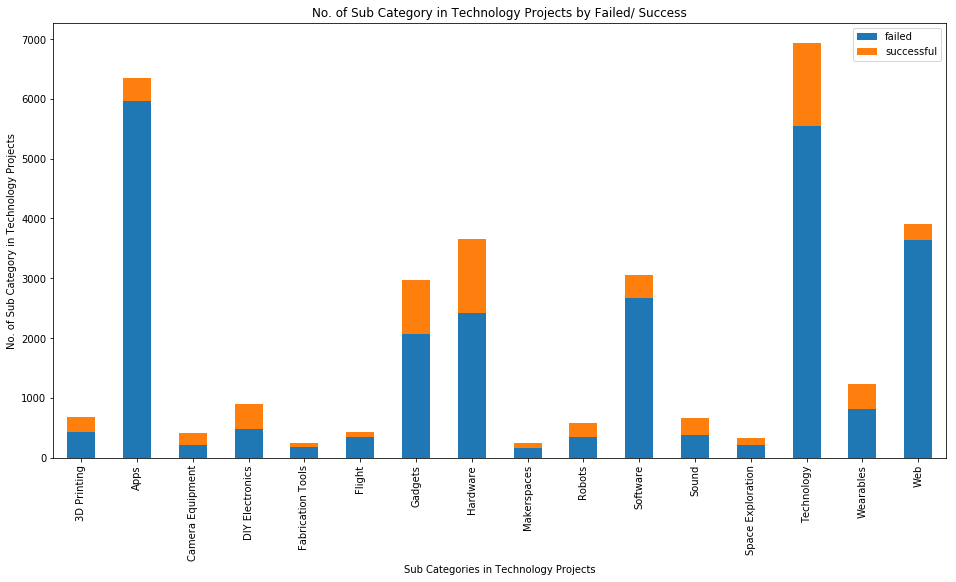

In [66]:
categorystatusdf = updateddf.copy()
categorystatusdf = categorystatusdf[categorystatusdf['main_category']=='Technology'].groupby(['category','newstate']).size().reset_index(name='count')
categorystatusdf

categorystatuspivot = pd.pivot_table(categorystatusdf, index=['category'], columns=['newstate'],
                                       values='count', aggfunc=np.sum)
categorystatuspivot = categorystatuspivot.reset_index()
categorystatuspivot.columns = ['category', 'failed', 'successful']
# categorystatuspivot.head()
categorystatuspivot_i = categorystatuspivot.set_index('category')
categorystatuspivot_i
fig, ax1 = plt.subplots()
categorystatuspivot_i.plot(kind='bar', stacked=True, 
                                  figsize=(16,8), title="No. of Sub Category in Technology Projects by Failed/ Success",
                                   ax=ax1)

ax1.set_xlabel("Sub Categories in Technology Projects")
ax1.set_ylabel("No. of Sub Category in Technology Projects")
plt.show()

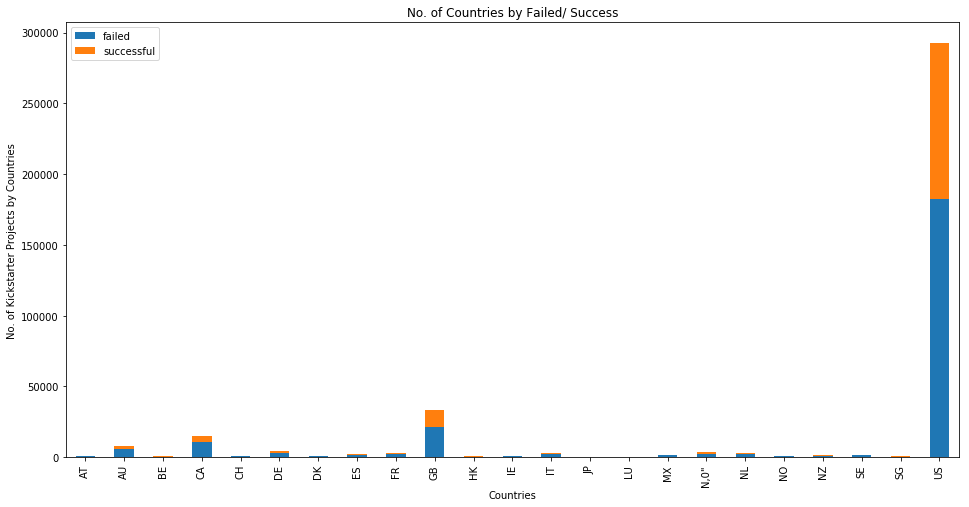

In [71]:
countrydf = updateddf.copy()
countrydf = countrydf.groupby(['country','newstate']).size().reset_index(name='count')

countrydfpivot = pd.pivot_table(countrydf, index=['country'], columns=['newstate'],
                                       values='count', aggfunc=np.sum)
countrydfpivot = countrydfpivot.reset_index()
countrydfpivot.columns = ['country', 'failed', 'successful']
# categorystatuspivot.head()
countrydfpivot_i = countrydfpivot.set_index('country')
countrydfpivot_i
fig, ax1 = plt.subplots()
countrydfpivot_i.plot(kind='bar', stacked=True, 
                                  figsize=(16,8), title="No. of Countries by Failed/ Success",
                                   ax=ax1)

ax1.set_xlabel("Countries")
ax1.set_ylabel("No. of Kickstarter Projects by Countries")
plt.show()

<h1>Using Decision Tree to analyze what would make a project have a high chance of success</h1>

<h2>Creating Dummy Variables for Categorical Data</h2>
<br>
As decision tree cannot use categorical data, dummy variables will be created for Main Category, Sub Category & Country.

In [12]:
maincategorylist = list(updateddf['main_category'].unique())
categorydummy =  {}
for i in range(len(maincategorylist)):
    categorydummy[maincategorylist[i]] = i
dummydf = updateddf.copy()

subcategorylist = list(updateddf['category'].unique())
subcategorydummy =  {}
for i in range(len(subcategorylist)):
    subcategorydummy[subcategorylist[i]] = i

countrylist = list(updateddf['country'].unique())
countrydummy =  {}
for i in range(len(countrylist)):
    countrydummy[countrylist[i]] = i
    

for key,value in subcategorydummy.items():
    dummydf.loc[dummydf.category == key, 'dummysubcategory'] = value
for key,value in categorydummy.items():
    dummydf.loc[dummydf.main_category == key, 'dummycategory'] = value
for key,value in countrydummy.items():
    dummydf.loc[dummydf.country == key, 'dummycountry'] = value
    
# dummydf

<h2>Splitting into X & Y Variables</h2>

After the dataset is split into X & Y variables, X variables are normalised using StandardScaler.fit_transform.

This is to improve the accuracy of the model, bringing all range of the X variables into a similar range.

Based on our above analysis, we will use Category, SubCategory, USD Pledged Real & USD Goal Real to train our model.

We would also like to use the duration of the funding (deadline - launched) as a feature to train our model. 

However, the conversion process is too complicated and thus, the model might not be too accurate.

In [13]:
X = dummydf[['dummycategory', 'dummysubcategory','dummycountry', 'usd_pledged_real','usd_goal_real']]
y = dummydf.newstate

y = y.values.reshape(y.shape[0],1)
X.shape
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=666)
dtree_model = DecisionTreeClassifier(criterion="entropy")

# Use the fit() function to train the decision tree model on the training set
#
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h2>Training Decision Tree without any specific parameters</h2>

We decided to train our Decision Tree model without tuning any parameters first.

In [14]:
# Use the model to predict the outcome on the test set
#
y_pred = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy score of the result
f1Score = round(f1_score(y_test, y_pred), 2)
recallScore = round(recall_score(y_test, y_pred), 2)
precscore = round(precision_score(y_test, y_pred), 2)
accScore = round(accuracy_score(y_test, y_pred), 2)


print("Accuracy for Model : {acc_score}".format(acc_score = accScore))
print("Precision for Model : {prec_score}".format(prec_score = precscore))
print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))

# The Decision tree is too good to be true, having an accuracy sco

[[48220    24]
 [   18 27471]]
Accuracy for Model : 1.0
Precision for Model : 1.0
Sensitivity/Recall for Model : 1.0
F1 Score for Model : 1.0


This shows that the model is predicting close to 100%, indicating that it is overfitting. As the number of features we have used are too less, we would instead look on how to prune the tree.

<h2> Tuning Parameters </h2>
<h3> Setting Max Depth </h3>

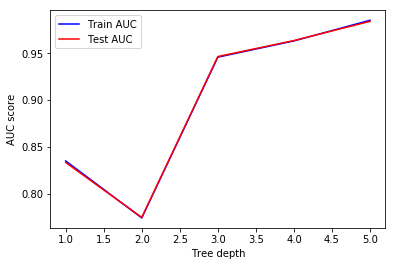

In [15]:
max_depths = np.linspace(1, 5, 5, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

This shows that the best tree-depth to stop is 3. 
If we were to stop at a tree depth of 2, it may cause underfitting.
If we were to increase its value beyond 3, it will cause overfitting.

<h2> Validating with Analysis</h2>

In [16]:
dtree_model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Use the fit() function to train the decision tree model on the training set
#
dtree_model.fit(X_train, y_train)

# Use the model to predict the outcome on the test set
#
y_pred = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy score of the result
f1Score = round(f1_score(y_test, y_pred), 2)
recallScore = round(recall_score(y_test, y_pred), 2)
precscore = round(precision_score(y_test, y_pred), 2)
accScore = round(accuracy_score(y_test, y_pred), 2)

print("Accuracy for Model with Max Depth of 3 : {acc_score}".format(acc_score = accScore))
print("Precision for Model with Max Depth of 3 : {prec_score}".format(prec_score = precscore))
print("Sensitivity/Recall for Model with Max Depth of 3 : {recall_score}".format(recall_score = recallScore))
print("F1 Score for Model with Max Depth of 3 : {f1_score}".format(f1_score = f1Score))

[[42793  5451]
 [  247 27242]]
Accuracy for Model with Max Depth of 3 : 0.92
Precision for Model with Max Depth of 3 : 0.83
Sensitivity/Recall for Model with Max Depth of 3 : 0.99
F1 Score for Model with Max Depth of 3 : 0.91


<h2>Final Analysis of tuning for max depth</h2>

By using a max depth of 3, the F1 score has dropped from a close estimate of 100% to 91%, making it more realistic than before. To ensure that this result is not a mere conincidence, we will use K-fold cross validation to ensure that our model is indeed accurate.

<h2>K-Fold Cross Validation (10 Folds)</h2>

In [17]:
#Define parameters for k-fold cv
n_splits = 10
kf = KFold(n_splits)

counter = 1
f1Scores = []
recallScores = []
precscores = []
accScores = []
aucScores = []
#Start k-fold cross validation 
for train_index, test_index in kf.split(X):
    
    #Split into training and testing set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dtree_model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

    # Use the fit() function to train the decision tree model on the training set
    #
    dtree_model.fit(X_train, y_train)

    # Use the model to predict the outcome on the test set
    #
    y_pred = dtree_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Find the accuracy score of the result
    f1Score = round(f1_score(y_test, y_pred), 2)
    recallScore = round(recall_score(y_test, y_pred), 2)
    precscore = round(precision_score(y_test, y_pred), 2)
    accScore = round(accuracy_score(y_test, y_pred), 2)
    
    print('\nMetrics for fold number: ' + str(counter))
    counter += 1
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = round(auc(false_positive_rate, true_positive_rate),2)
    # Add auc score to previous test results
    aucScores.append(roc_auc)
    print("Accuracy for Model : {acc_score}".format(acc_score = accScore))
    print("Precision for Model : {prec_score}".format(prec_score = precscore))
    print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
    print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))
    print("AUC for Model : {auc}".format(auc = roc_auc))
    #Print metrics and store in numpy array to average after end of cv
    
    f1Scores.append(f1Score)
    recallScores.append(recallScore)
    precscores.append(precscore)
    accScores.append(accScore)
    
#Averaging of metrics    
avgf1 = round(sum(f1Scores)/len(f1Scores),2)
avgrecall = round(sum(recallScores)/len(recallScores),2)
avgprec = round(sum(precscores)/len(precscores),2)
avgacc = round(sum(accScores)/len(accScores),2)
avgauc = round(sum(aucScores)/len(aucScores),2)

print('\nSummary metrics:')
print("Accuracy for Model : {acc_score}".format(acc_score = avgacc))
print("Precision for Model : {prec_score}".format(prec_score = avgprec))
print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = avgrecall))
print("F1 Score for Model : {f1_score}".format(f1_score = avgf1))
print("AUC for Model : {auc}".format(auc = avgauc))


Metrics for fold number: 1
Accuracy for Model : 0.93
Precision for Model : 0.84
Sensitivity/Recall for Model : 0.99
F1 Score for Model : 0.91
AUC for Model : 0.94

Metrics for fold number: 2
Accuracy for Model : 0.93
Precision for Model : 0.84
Sensitivity/Recall for Model : 0.99
F1 Score for Model : 0.91
AUC for Model : 0.94

Metrics for fold number: 3
Accuracy for Model : 0.92
Precision for Model : 0.82
Sensitivity/Recall for Model : 0.99
F1 Score for Model : 0.9
AUC for Model : 0.94

Metrics for fold number: 4
Accuracy for Model : 0.92
Precision for Model : 0.82
Sensitivity/Recall for Model : 0.99
F1 Score for Model : 0.9
AUC for Model : 0.93

Metrics for fold number: 5
Accuracy for Model : 0.92
Precision for Model : 0.82
Sensitivity/Recall for Model : 0.99
F1 Score for Model : 0.9
AUC for Model : 0.93

Metrics for fold number: 6
Accuracy for Model : 0.92
Precision for Model : 0.82
Sensitivity/Recall for Model : 0.99
F1 Score for Model : 0.9
AUC for Model : 0.94

Metrics for fold nu

This shows that our model indeeds perform at a consistent accuracy rate of having 91% F1 score.

<h2>Analyzing feature importance of Kickstarter Projects</h2>

In [18]:
# Find out the features that have the most importance
print("Feature importances:\n{}".format(dtree_model.feature_importances_))

Feature importances:
[0.        0.        0.        0.8153921 0.1846079]


,labels,values
0,dummycategory,0.000000
1,dummysubcategory,0.000000
2,dummcountry,0.000000
3,usd_pledged_real,0.815392
4,usd_goal_real,0.184608


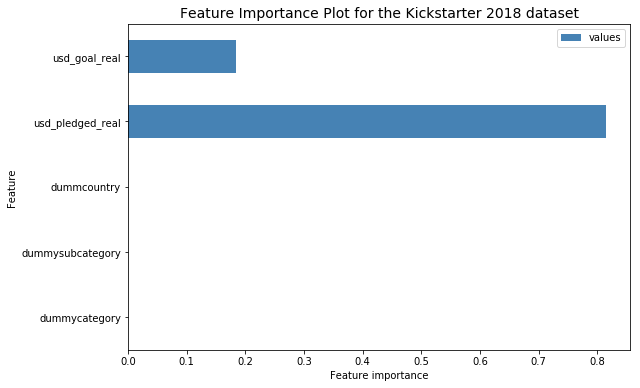

In [19]:
feats_df = pd.DataFrame({'labels' : ['dummycategory','dummysubcategory','dummcountry','usd_pledged_real','usd_goal_real'], 'values' : dtree_model.feature_importances_})
display(feats_df)
###
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')

# Additional parameters are given to you.
ax.set_title("Feature Importance Plot for the Kickstarter 2018 dataset", fontsize=14)
ax.set_xlabel("Feature importance")
ax.set_ylabel("Feature")
plt.show()

Therefore, we can conclude that the category of the project does not determine the success of the project. The amount of money pledged determines about 82% of how successful the project is while the amount of money the user targets determines 18%.